CNN 理論與實作 LLH @NCCU MITC 2021.05.10

# ```TensorFlow``` 與 ```Keras```

- Kera 的創建者: Google AI 開發人員 Francois Chollet (2015.03.27 發布) 
- TensorFlow 的創建者: Google 大腦 (Google Brain) (2015.11.09 發布)

## TensorFlow 與 Kera 的關係:

參考資料: [TensorFlow 2.0中的tf.keras和Keras有何區別？為什麼以後一定要用tf.keras？](https://www.jiqizhixin.com/articles/2019-12-09-10) 

- 後端是一個計算引擎: 它可以構建網絡的圖和拓撲結構，運行優化器，並執行具體的數字運算。  
- 試想你需要從頭開始構建一個網站。你可以使用 PHP 編程語言和 SQL 數據庫。這個 SQL 數據庫就是是後端。你可以使用MySQL，PostgreSQL 或者 SQL Server 作為你的數據庫。
---
- TensorFlow 從 Keras v1.1.0 發行版開始成為 Keras 的默認後端。
- Google 於 2019 年 6 月發布 TensorFlow 2.0 並宣布 Keras 現在是 TensorFlow 的官方高級API，用於快速簡單的模型設計和訓練。

TensorFlow 2.0 特性:  
- Sessions 和eager execution
- 自動求導
- 模型和層的子類化
- 更好的多GPU /分佈式訓練支持

# CNN:

### 1. What is CNN?

- 由法裔計算機科學家 楊立昆（法語：Yann Le Cun) 提出。
- 做影像辨識最好的工具之一。

###  CNN 的模型想法:

- 上禮拜教的 NN 都是 fully-connected layers (一個對一個)，但 CNN 新增的 layers (Convolution 與 Pooling) 不是 fully-connected layer。 
- 影像辨識: 只需讓機器學習圖片中的重點特徵。舉例 (見下圖):
- 因此，如果能夠創造一個過濾器，用來掃描整張圖片，並把重點記錄下來，就可以節省所需的參數。

![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

![alt text](https://drive.google.com/uc?export=view&id=1M7v7S-b-zisFLI_G4ZY_RdUJQrGpJ3zt)

###  CNN 模型架構

#### <font color='red'>Convolution Layer (卷積層)</font>: 指定 ```filter``` 的 ```kernel```、```padding```、```stride```。
- ```Kernel```: 
    - 卷積核。又稱為 filter、features dectectors。
    - 一個 kernel 代表一個我們想要觀察的特徵，通常一層 CNN 會有 32 個 filters。  
- ```Padding```: 
    - 目的: 確保經過 CNN 後的 output (稱為 ```response map```)大小跟原來的 input 一樣。  
    - 原因: 圖片再經過 filter 後會變小 (可以自己畫畫看)，如果要做很多層 CNN，可能到最後無法做 filter。
    - 做法: 決定一個填充值 (通常機器會自己判斷)，機器將圖片填滿 (填入的數字均為 0)使得最後的 feature map 大小與 input 相同。
- ```Stride```: 
    - 目的: 做完一次 filter 後，要繼續往右邊走來讀取整張圖片。
    - 做法: 通常是 1。
- 最終 feature map 的大小取決於 ```Padding``` 與 ```Stride```。

#### <font color='red'>Pooling Layer (池化層) </font>: 指定 ```pool size```。

再經過 Convolution Layer 後，會得到太多 feature maps (如果有 32 個 filters，就會有 32 張 feature maps，稱為 depth = 32)。 
太多資料會讓機器學習的效率變差，因此資料每通過一層 feature map，會再通過 pooling layer 讓 output 變小。

- 做法: 把 feature map 分割成數個區域，再依據選擇的是 Max、Min、Average Pooling... (通常是用 Max Pooling) 決定每個區域的代表值。   

做完 Convoluation layers 與 Pooling layers 後，最終的產物是許多的 feature maps (2*2 的 <font color='blue'> 矩陣 </font>)。  
但不要忘記影像辨識最終的目的是要判斷該圖片為何種物件。因此要把 <font color='blue'> 矩陣 </font> 轉為 <font color='blue'> 向量 </font>。<font color='green'> 做法是再加一層 FC (Fully Connected) layer。

### 補充: 關於圖片...

圖片是三維資料，三維分別指的是:   
- 影像的長
- 影像的寬
- color channel(位元色板) [參考資料](https://www.oxxostudio.tw/articles/201406/color-channel.html)
---
![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)
如此圖所示，一張照片有其長和寬，而一層 (depth=1)代表一個 pixel，一個 pixel 是一個介於 0-255 的數字。  
三層 (一般 RGB 照片, depth=3) 則代表每一個 pixel 有三個數字 (其中每個數字都介於 0-255)。

---

# CNN 實作:

[資料來源: **CIFAR Image Dataset**](https://www.cs.toronto.edu/~kriz/cifar.html)  
說明:  
共有 60000 筆 32*32 的彩色圖片，圖片的內容是 10 個日常生活中的物件 (每個物件有 6000 筆資料)，這 10 個物件包含:  
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

## 1. import 相關套件:

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. 把資料讀入:

In [27]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [28]:
train_images[0].shape

(32, 32, 3)

## 3. 資料處理:

In [23]:
# normalize pixel values to 0~1:
train_images, test_images = train_images / 255.0, test_images / 255.0

# create classes for the images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

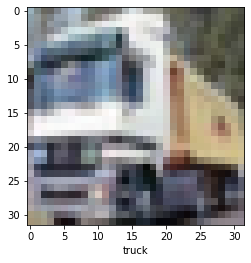

In [26]:
# check the image
IMG_INDEX = 1
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## 4. 規劃神經網路

本例使用:  
1. 一層 Convolution (filter 大小: 3*3、數量: 32)
2. 一層 Max Pooling (2*2、stride = 2)
3. 一層 Convolution (filter 大小: 3*3、數量: 64)
4. 一層 Max Pooling (2*2、stride = 2)
5. 一層 Fully connected NN

In [30]:
model = models.Sequential() # create a blank model

In [31]:
# 第一次 Convolution + Max Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 第二次 Convolution + Max Pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## 5. 查看初步模型情況

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


觀察 ```Output Shape```，你是否可以解釋結果?

## 6. 新增 FC (Fully Connected) layer

In [35]:
model.add(layers.Flatten()) # 將 4*4*64 拉成單維。
model.add(layers.Dense(64, activation='relu')) # fully dense
model.add(layers.Dense(10)) # output 必須是 10。

## 7. Compile the model

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 8. Fit (the data to) the model